In [131]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [155]:
import pandas as pd
import random

# Define symptom pool
symptoms_pool = [
    "Fever", "Cough", "Loss of appetite", "Limping", "Swelling", "Pain", "Vomiting",
    "Diarrhea", "Dehydration", "Rash", "Itching", "Sneezing", "Watery eyes",
    "Lethargy", "Weight loss", "Bruising", "Hair loss", "Nasal discharge",
    "Ear infection", "Excessive drooling", "Red eyes", "Shivering", "Anxiety", "Aggression"
]

# Disease-symptom mapping (more realistic)
disease_symptom_map = {
    "Flu": ["Fever", "Cough", "Sneezing", "Lethargy", "Watery eyes"],
    "Leg Injury": ["Limping", "Swelling", "Pain", "Bruising"],
    "Food Poisoning": ["Vomiting", "Diarrhea", "Dehydration", "Loss of appetite"],
    "Skin Infection": ["Rash", "Itching", "Hair loss", "Red eyes"],
    "Allergy": ["Itching", "Sneezing", "Watery eyes", "Rash"],
    "Worm Infestation": ["Weight loss", "Vomiting", "Diarrhea", "Lethargy"],
    "Respiratory Infection": ["Cough", "Nasal discharge", "Sneezing", "Fever"],
    "Muscle Strain": ["Limping", "Pain", "Shivering", "Lethargy"],
    "Eye Infection": ["Red eyes", "Watery eyes", "Discharge", "Lethargy"],
    "Ear Mite Infestation": ["Ear infection", "Itching", "Aggression", "Shivering"],
    "Dental Disease": ["Loss of appetite", "Excessive drooling", "Pain", "Aggression"],
    "Parvovirus": ["Vomiting", "Diarrhea", "Dehydration", "Fever"],
    "Arthritis": ["Limping", "Pain", "Lethargy", "Shivering"]
}

# Generate 10,000 rows of more meaningful data
data = []
for _ in range(100):
    disease = random.choice(list(disease_symptom_map.keys()))
    core_symptoms = disease_symptom_map[disease]
    
    # Choose 2–4 core symptoms
    chosen_symptoms = random.sample(core_symptoms, k=random.randint(2, min(4, len(core_symptoms))))
    
    # Add 0–1 noise symptoms (from unrelated symptoms)
    noise_symptoms = list(set(symptoms_pool) - set(core_symptoms))
    if random.random() < 0.3:  # 30% chance of adding noise
        chosen_symptoms.append(random.choice(noise_symptoms))
    
    # Ensure 3 symptoms per row (pad if needed)
    while len(chosen_symptoms) < 3:
        chosen_symptoms.append(random.choice(core_symptoms))
    random.shuffle(chosen_symptoms)
    
    # Add row
    data.append(chosen_symptoms[:3] + [disease])

# Create DataFrame
df = pd.DataFrame(data, columns=["Symptom1", "Symptom2", "Symptom3", "Disease"])
df

,Symptom1,Symptom2,Symptom3,Disease
0,Red eyes,Discharge,Watery eyes,Eye Infection
1,Itching,Red eyes,Red eyes,Skin Infection
2,Sneezing,Nasal discharge,Limping,Respiratory Infection
3,Watery eyes,Cough,Lethargy,Flu
4,Diarrhea,Dehydration,Fever,Parvovirus
...,...,...,...,...
95,Shivering,Sneezing,Rash,Allergy
96,Pain,Shivering,Lethargy,Arthritis
97,Pain,Shivering,Limping,Arthritis
98,Vomiting,Loss of appetite,Diarrhea,Food Poisoning


In [156]:
df['Disease'].value_counts()

Disease
Skin Infection           10
Muscle Strain            10
Ear Mite Infestation     10
Respiratory Infection     9
Dental Disease            9
Leg Injury                9
Food Poisoning            8
Worm Infestation          8
Flu                       7
Eye Infection             6
Parvovirus                5
Allergy                   5
Arthritis                 4
Name: count, dtype: int64

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Symptom1  100 non-null    object
 1   Symptom2  100 non-null    object
 2   Symptom3  100 non-null    object
 3   Disease   100 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


In [158]:
df_onehot = pd.get_dummies(df, columns=['Symptom1', 'Symptom2', 'Symptom3'])

In [159]:
df_onehot.shape

(100, 73)

In [172]:
X = df_onehot.drop(columns=['Disease']).astype('float32')
y = df_onehot['Disease']

In [173]:
X.shape

(100, 72)

In [174]:
y.shape

(100,)

In [183]:
from sklearn.model_selection import train_test_split

# Convert features to float
X = df_onehot.drop(columns=['Disease']).astype('float32')

# Encode target (label encoding or one-hot)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df_onehot['Disease'])  # y will be integer labels

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [184]:
import numpy as np

num_classes = len(np.unique(y_train))  # y_train should be integers like 0,1,2,...
print("Number of classes:", num_classes)

Number of classes: 13


In [185]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=72))   # Input layer (72 features)
model.add(Dense(128, activation='relu'))                # Hidden layer
model.add(Dense(num_classes, activation='softmax')) 

C:\Users\HP\Desktop\sample_project_2\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [186]:
from tensorflow.keras.optimizers import Adam

In [187]:
optimizer = Adam(learning_rate=0.001)

In [188]:
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',  # Use this if labels are integers
              metrics=['accuracy'])

In [189]:
print(X_train.dtypes)  # Should show all float32 or int64

Symptom1_Aggression     float32
Symptom1_Bruising       float32
Symptom1_Cough          float32
Symptom1_Dehydration    float32
Symptom1_Diarrhea       float32
                         ...   
Symptom3_Sneezing       float32
Symptom3_Swelling       float32
Symptom3_Vomiting       float32
Symptom3_Watery eyes    float32
Symptom3_Weight loss    float32
Length: 72, dtype: object


In [191]:
y_train

array([ 5, 11,  6,  7, 11,  8, 12,  1, 10, 12,  5, 12,  7,  3,  2,  3,  6,
       10, 12,  8, 12, 10,  0,  0,  4,  4,  7, 11,  1,  3,  4,  5,  8,  9,
        6,  9,  6,  0, 11,  2,  7,  3, 11,  6,  3,  8,  8,  1,  8,  1, 11,
        5,  5,  0,  6, 10,  2,  9,  2,  3, 10, 12,  4,  7, 11,  9, 12, 10,
        2,  0,  3,  7,  7, 10,  6,  5,  3,  8,  4,  3])

In [194]:
# Train the model and save the training history
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8243 - loss: 1.2884 - val_accuracy: 0.5000 - val_loss: 1.8978
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8892 - loss: 1.1113 - val_accuracy: 0.5000 - val_loss: 1.8261
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8300 - loss: 1.0644 - val_accuracy: 0.5000 - val_loss: 1.7543
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8366 - loss: 0.9620 - val_accuracy: 0.5000 - val_loss: 1.6893
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8905 - loss: 0.7844 - val_accuracy: 0.5000 - val_loss: 1.6290
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9283 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 1.5798
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9064 - loss: 0.6517 - val_accuracy: 0.5000 - val_loss: 1.5453
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9210 - loss: 0.5794 - val_accuracy: 0.5000 - val_loss:

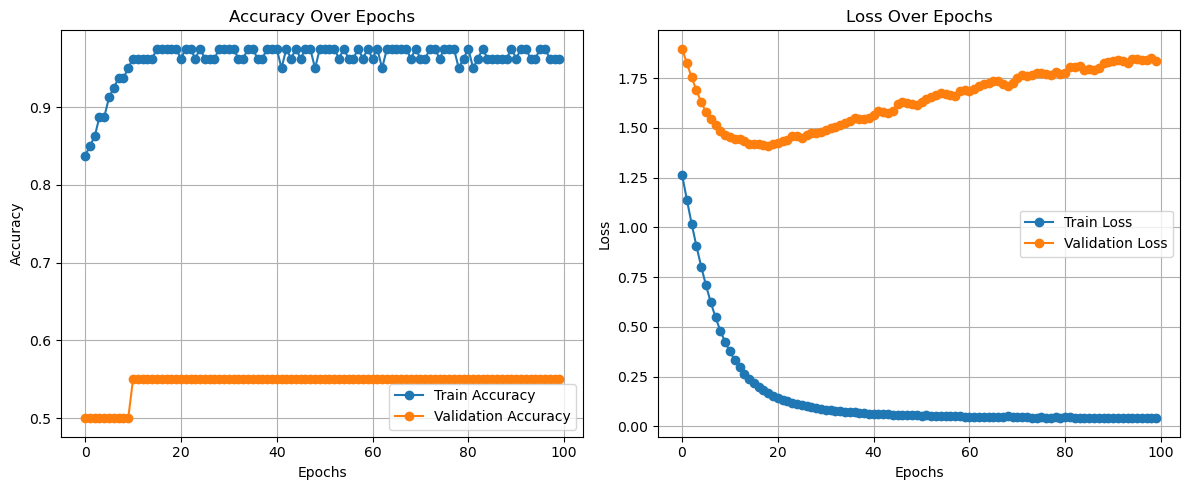

In [195]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()